# Random Forest

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('C://Users//welcome//Desktop/Gradient boost//Churn_Modelling.csv')

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

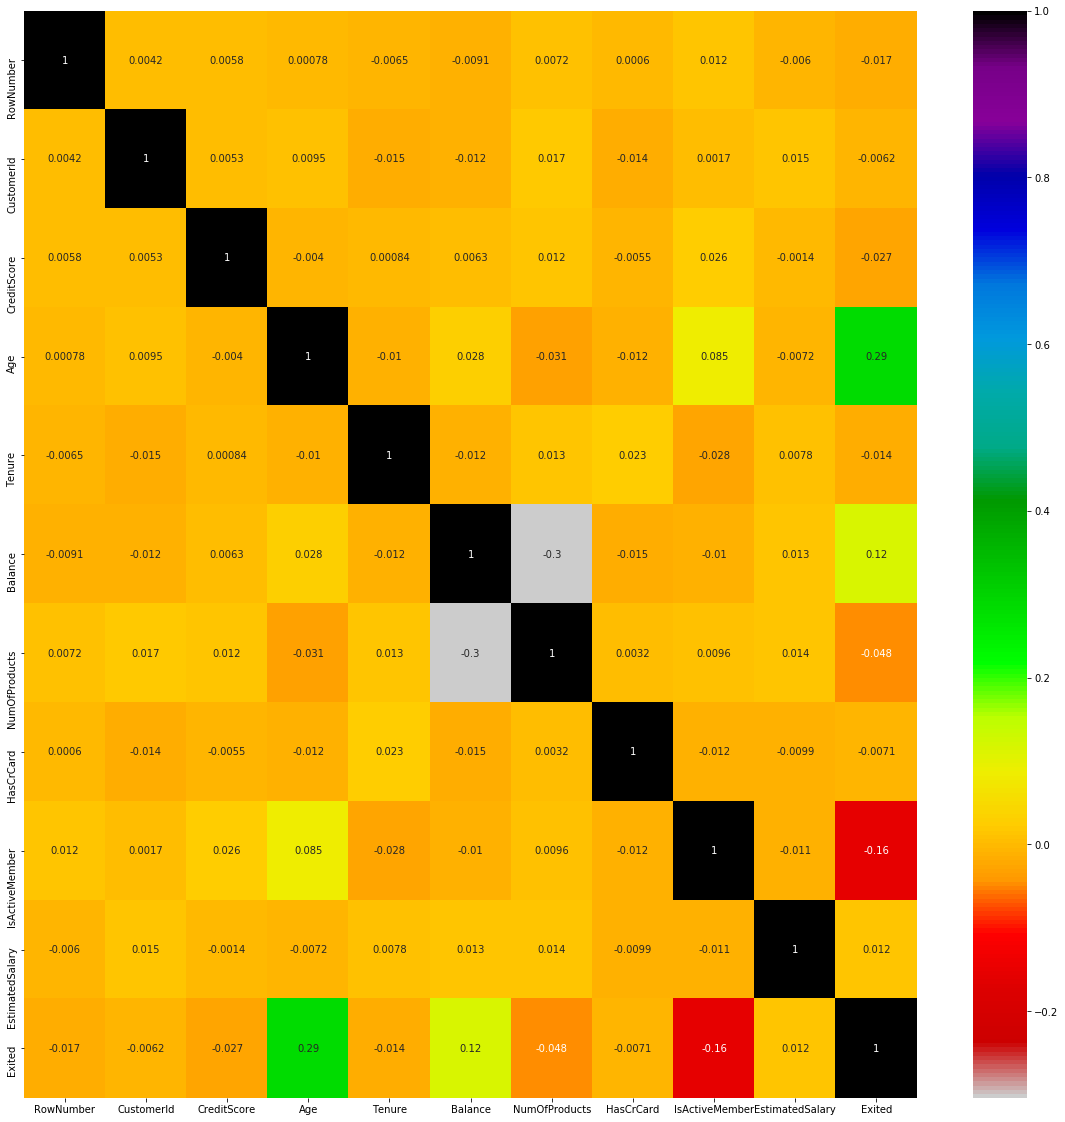

In [6]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, cmap='nipy_spectral_r')

In [7]:
#dividing the data into set of features and target

X = df.iloc[:, 3:13]
y = df.iloc[:, 13]

In [8]:
#convert the text-categorical classes using either one hot encoding or pandas get_dummies
#Here Geography and Gender are text-categorical classes

print('Geography -->', X['Geography'].unique())
print('Gender -->', X['Gender'].unique())

Geography --> ['France' 'Spain' 'Germany']
Gender --> ['Female' 'Male']


In [9]:
Geography = pd.get_dummies( X['Geography'] , drop_first=True)
Geography.head()

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1


In [10]:
Gender = pd.get_dummies( X['Gender'] , drop_first=True)
Gender.head()

,Male
0,0
1,0
2,0
3,0
4,0


In [11]:
X.drop(['Gender', 'Geography'], axis=1, inplace=True)

In [12]:
X = pd.concat([X, Gender, Geography], axis=1)

In [13]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Male,Germany,Spain
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1


# Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier

#### Hyperparameter tuning

In [32]:
from sklearn.model_selection import GridSearchCV

In [37]:
parameters = {
                'n_estimators'  : [10, 20, 50, 100],
                'criterion'     : ["gini","entropy"]
            }

In [38]:
Random_forest_hyperparameter = GridSearchCV(estimator = RandomForestClassifier(),
                                            param_grid = parameters,
                                            cv = 5,
                                            verbose = 3)

In [40]:
Random_forest_hyperparameter.fit(X,y)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] criterion=gini, n_estimators=10 .................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ..... criterion=gini, n_estimators=10, score=0.844, total=   0.4s
[CV] criterion=gini, n_estimators=10 .................................
[CV] ..... criterion=gini, n_estimators=10, score=0.859, total=   0.2s
[CV] criterion=gini, n_estimators=10 .................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


[CV] ..... criterion=gini, n_estimators=10, score=0.851, total=   0.2s
[CV] criterion=gini, n_estimators=10 .................................
[CV] ..... criterion=gini, n_estimators=10, score=0.853, total=   0.2s
[CV] criterion=gini, n_estimators=10 .................................
[CV] ..... criterion=gini, n_estimators=10, score=0.855, total=   0.2s
[CV] criterion=gini, n_estimators=20 .................................
[CV] ..... criterion=gini, n_estimators=20, score=0.850, total=   0.4s
[CV] criterion=gini, n_estimators=20 .................................
[CV] ..... criterion=gini, n_estimators=20, score=0.865, total=   0.4s
[CV] criterion=gini, n_estimators=20 .................................
[CV] ..... criterion=gini, n_estimators=20, score=0.855, total=   0.4s
[CV] criterion=gini, n_estimators=20 .................................
[CV] ..... criterion=gini, n_estimators=20, score=0.861, total=   0.4s
[CV] criterion=gini, n_estimators=20 .................................
[CV] .

[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:   38.3s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

## getting the analysis of GridSearchCV

* getting the best estimator using --->    .best_estimator_

In [41]:
Random_forest_hyperparameter.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [43]:
Random_forest_hyperparameter.best_params_

{'criterion': 'gini', 'n_estimators': 50}

In [44]:
Random_forest_hyperparameter.best_score_

0.8641

#### creating the model using optimal parameter values

In [45]:
model = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                               criterion='gini', max_depth=None, max_features='auto',
                               max_leaf_nodes=None, max_samples=None,
                               min_impurity_decrease=0.0, min_impurity_split=None,
                               min_samples_leaf=1, min_samples_split=2,
                               min_weight_fraction_leaf=0.0, n_estimators=50,
                               n_jobs=None, oob_score=False, random_state=None,
                               verbose=0, warm_start=False)

#### getting the model performance using Cross Validation

In [46]:
from sklearn.model_selection import cross_val_score

In [50]:
score = cross_val_score(RandomForestClassifier(), X, y , cv = 10)

In [51]:
#getting the mean of score
score.mean()

0.8615

### model accuracy = 86.15%

    no feature engineering has been done here; doing so we can increase the above accuracy

